In [29]:
import pandas as pd
import plotly.express as px
import numpy as np
import geopandas as gpd
import os
#import pm4py

# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.tree import plot_tree
# nice plots & tables
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# to make a counter object
from collections import Counter
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv("C:\\Users\\20203666\\Documents\\JBG050-data\\Data\\cleaned_search_data.csv")
df

Unnamed: 0                       Type                       Date  \
0                 0              Person search  2014-03-31 23:05:00+00:00   
1                 1              Person search  2014-03-31 23:05:00+00:00   
2                 2              Person search  2014-03-31 23:05:00+00:00   
3                 3              Person search  2014-03-31 23:05:00+00:00   
4                 4              Person search  2014-03-31 23:45:00+00:00   
...             ...                        ...                        ...   
1624220     1624220  Person and Vehicle search  2021-10-31 23:20:00+00:00   
1624221     1624221              Person search  2021-10-31 23:20:00+00:00   
1624222     1624222              Person search  2021-10-31 23:20:00+00:00   
1624223     1624223              Person search  2021-10-31 23:40:00+00:00   
1624224     1624224  Person and Vehicle search  2021-10-31 23:45:00+00:00   

         Latitude2   Latitude  Longitude Gender Age range  \
0         0.844310  50.844310  -1.067920   Male     18-24   
1         0.844310  50.844310  -1.067920   Male     18-24   
2         0.813747  50.813747  -1.078507   Male   over 34   
3         0.844310  50.844310  -1.067920   Male     18-24   
4         0.914817  50.914817  -1.329434   Male     18-24   
...            ...        ...        ...    ...       ...   
1624220   3.777483  53.777483  -1.776611   Male     18-24   
1624221   3.777483  53.777483  -1.776611   Male     18-24   
1624222   3.777483  53.777483  -1.776611   Male     25-34   
1624223   3.850550  53.850550  -1.840857   Male     18-24   
1624224   3.782293  53.782293  -1.782292   Male   over 34   

        Self-defined ethnicity Officer-defined ethnicity  day of week  month  \
0                        White                     White            0      3   
1                        White                     White            0      3   
2                        White                     White            0      3   
3                        White                     White            0      3   
4                        White                     White            0      3   
...                        ...                       ...          ...    ...   
1624220                  White                     White            6     10   
1624221                  White                     White            6     10   
1624222                  Asian                     Asian            6     10   
1624223                  White                     White            6     10   
1624224                  White                     White            6     10   

         hour  year                                        Legislation  \
0          23     4  Police and Criminal Evidence Act 1984 (section 1)   
1          23     4  Police and Criminal Evidence Act 1984 (section 1)   
2          23     4  Police and Criminal Evidence Act 1984 (section 1)   
3          23     4  Police and Criminal Evidence Act 1984 (section 1)   
4          23     4  Police and Criminal Evidence Act 1984 (section 1)   
...       ...   ...                                                ...   
1624220    23    11              Misuse of Drugs Act 1971 (section 23)   
1624221    23    11              Misuse of Drugs Act 1971 (section 23)   
1624222    23    11              Misuse of Drugs Act 1971 (section 23)   
1624223    23    11  Police and Criminal Evidence Act 1984 (section 1)   
1624224    23    11              Misuse of Drugs Act 1971 (section 23)   

                 Object of search               Outcome         result  
0                    Stolen goods         Nothing found  Nothing found  
1                    Stolen goods         Nothing found  Nothing found  
2        Article for use in theft         Nothing found  Nothing found  
3                    Stolen goods         Nothing found  Nothing found  
4        Article for use in theft         Nothing found  Nothing found  
...                           ...                   ...        

In [22]:
def balance_dataset(df, max_class, column):
    unique = list(df[column].unique())
    df_nf = df[df[column]==unique[0]].sample(frac=1)[:max_class]
    df_arr = df[df[column]==unique[1]].sample(frac=1)[:max_class]
    df_cr = df[df[column]==unique[2]].sample(frac=1)[:max_class]
    df_war = df[df[column]==unique[3]].sample(frac=1)[:max_class]
    df_sum = df[df[column]==unique[4]].sample(frac=1)[:max_class]
    df_fine = df[df[column]==unique[5]].sample(frac=1)[:max_class]
    df_all = pd.concat([df_nf,df_arr,df_cr,df_war,df_sum,df_fine])
    df_all = df_all.sample(frac=1)
    df_all.reset_index(inplace=True, drop=True)
    return df_all

In [39]:
df_all = balance_dataset(df, 20000, 'result')
df_all

Unnamed: 0                       Type                       Date  \
0          1608737  Person and Vehicle search  2021-10-06 13:22:00+00:00   
1           658762              Person search  2019-01-31 17:30:00+00:00   
2           353878              Person search  2017-07-09 19:45:00+00:00   
3           285183  Person and Vehicle search  2017-02-07 02:33:00+00:00   
4           250775              Person search  2016-12-16 12:24:00+00:00   
...            ...                        ...                        ...   
108855     1510463  Person and Vehicle search  2021-05-27 19:05:00+00:00   
108856      175521              Person search  2016-07-22 18:55:00+00:00   
108857      607174              Person search  2018-11-16 19:40:00+00:00   
108858      660926              Person search  2019-01-24 00:00:00+00:00   
108859      356416              Person search  2017-07-21 00:54:00+00:00   

        Latitude2   Latitude  Longitude Gender Age range  \
0        1.503626  51.503626  -0.023341   Male     18-24   
1        1.472384  51.472384  -0.085054   Male     18-24   
2        3.794800  53.794800  -1.549110   Male   over 34   
3        1.401743  51.401743   0.111464   Male   over 34   
4        3.289884  53.289884  -3.065698   Male     10-17   
...           ...        ...        ...    ...       ...   
108855   1.569974  51.569974   0.165601   Male     18-24   
108856   1.479839  51.479839  -0.071881   Male     10-17   
108857   1.588629  51.588629  -0.222117   Male     25-34   
108858   0.999160  50.999160  -0.113410   Male     18-24   
108859   3.204137  53.204137  -0.572919   Male     18-24   

       Self-defined ethnicity Officer-defined ethnicity  day of week  month  \
0                       Black                     Black            2     10   
1                       Black                     Black            3      1   
2                       Asian                     Other            6      7   
3                       White                     White            1      2   
4                       White                     White            4     12   
...                       ...                       ...          ...    ...   
108855                  White                     White            3      5   
108856                  Black                     Black            4      7   
108857                  White                     White            4     11   
108858                  White                     White            3      1   
108859                  White                     White            4      7   

        hour  year                                        Legislation  \
0         13    11  Police and Criminal Evidence Act 1984 (section 1)   
1         17     9  Police and Criminal Evidence Act 1984 (section 1)   
2         19     7  Police and Criminal Evidence Act 1984 (section 1)   
3          2     7  Police and Criminal Evidence Act 1984 (section 1)   
4         12     6              Misuse of Drugs Act 1971 (section 23)   
...      ...   ...                                                ...   
108855    19    11              Misuse of Drugs Act 1971 (section 23)   
108856    18     6  Police and Criminal Evidence Act 1984 (section 1)   
108857    19     8  Police and Criminal Evidence Act 1984 (section 1)   
108858     0     9  Police and Criminal Evidence Act 1984 (section 1)   
108859     0     7  Police and Criminal Evidence Act 1984 (section 1)   

                           Object of search               Outcome  \
0                         Offensive weapons                Arrest   
1                         Offensive weapons                Arrest   
2                  Article for use in theft               Summons   
3       Articles for use in criminal damage                Arrest   
4                          Controlled drugs         Nothing found   
...                                     ...                   ...   
108855                     Controlled drugs  Community resolution

In [40]:
X = df_all[['Type', 'Latitude2', 'Longitude', 'Gender', 'Age range', 'Self-defined ethnicity', 'Officer-defined ethnicity',
            'day of week', 'month', 'hour', 'year']]
X = pd.get_dummies(X)
Y = df_all['result']
Y2 = pd.factorize(Y)[0]

In [41]:
X

Latitude2  Longitude  day of week  month  hour  year  \
0        1.503626  -0.023341            2     10    13    11   
1        1.472384  -0.085054            3      1    17     9   
2        3.794800  -1.549110            6      7    19     7   
3        1.401743   0.111464            1      2     2     7   
4        3.289884  -3.065698            4     12    12     6   
...           ...        ...          ...    ...   ...   ...   
108855   1.569974   0.165601            3      5    19    11   
108856   1.479839  -0.071881            4      7    18     6   
108857   1.588629  -0.222117            4     11    19     8   
108858   0.999160  -0.113410            3      1     0     9   
108859   3.204137  -0.572919            4      7     0     7   

        Type_Person and Vehicle search  Type_Person search  \
0                                    1                   0   
1                                    0                   1   
2                                    0                   1   
3                                    1                   0   
4                                    0                   1   
...                                ...                 ...   
108855                               1                   0   
108856                               0                   1   
108857                               0                   1   
108858                               0                   1   
108859                               0                   1   

        Type_Vehicle search  Gender_Female  ...  Self-defined ethnicity_Asian  \
0                         0              0  ...                             0   
1                         0              0  ...                             0   
2                         0              0  ...                             1   
3                         0              0  ...                             0   
4                         0              0  ...                             0   
...                     ...            ...  ...                           ...   
108855                    0              0  ...                             0   
108856                    0              0  ...                             0   
108857                    0              0  ...                             0   
108858                    0              0  ...                             0   
108859                    0              0  ...                             0   

        Self-defined ethnicity_Black  Self-defined ethnicity_Mixed  \
0                                  1                             0   
1                                  1                             0   
2                                  0                             0   
3                                  0                             0   
4                                  0                             0   
...                              ...                           ...   
108855                             0                             0   
108856                             1                             0   
108857                             0                             0   
108858                             0                             0   
108859                             0                             0   

        Self-defined ethnicity_Other  Self-defined ethnicity_White  \
0                                  0                             0   
1                                  0                             0   
2                                  0                             0   
3                                  0                             1   
4                                  0                             1   
...                              ...                           ...   
108855                             0                             1   
108856                             0                             0   
108857                             0              

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y2, test_size=0.1, random_state=42)

In [43]:
depths = [1,2,3,4,5,6,7,8,9,10,15,20]
X_rf_scores = pd.DataFrame()
for depth in depths:
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    X_rf_scores[depth] = cross_val_score(clf, X, Y2, cv=5)
print(X_rf_scores)

         1         2         3         4         5         6         7   \
0  0.318528  0.328817  0.330930  0.346087  0.354630  0.363035  0.370981   
1  0.319585  0.327852  0.334650  0.348200  0.360233  0.364413  0.374288   
2  0.318758  0.329506  0.333180  0.348383  0.356375  0.366847  0.373369   
3  0.317059  0.328128  0.331802  0.350496  0.357753  0.368087  0.374885   
4  0.320641  0.331159  0.339565  0.349899  0.361014  0.366204  0.377365   

         8         9         10        15        20  
0  0.376722  0.378330  0.381821  0.391099  0.388481  
1  0.381407  0.384393  0.386643  0.395416  0.393625  
2  0.379983  0.384485  0.386735  0.397942  0.397667  
3  0.381407  0.385128  0.384393  0.398080  0.397942  
4  0.377733  0.385174  0.388894  0.401938  0.394681  


In [46]:
clf = RandomForestClassifier(max_depth=15, random_state=0)
model = clf.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.39601322799926514


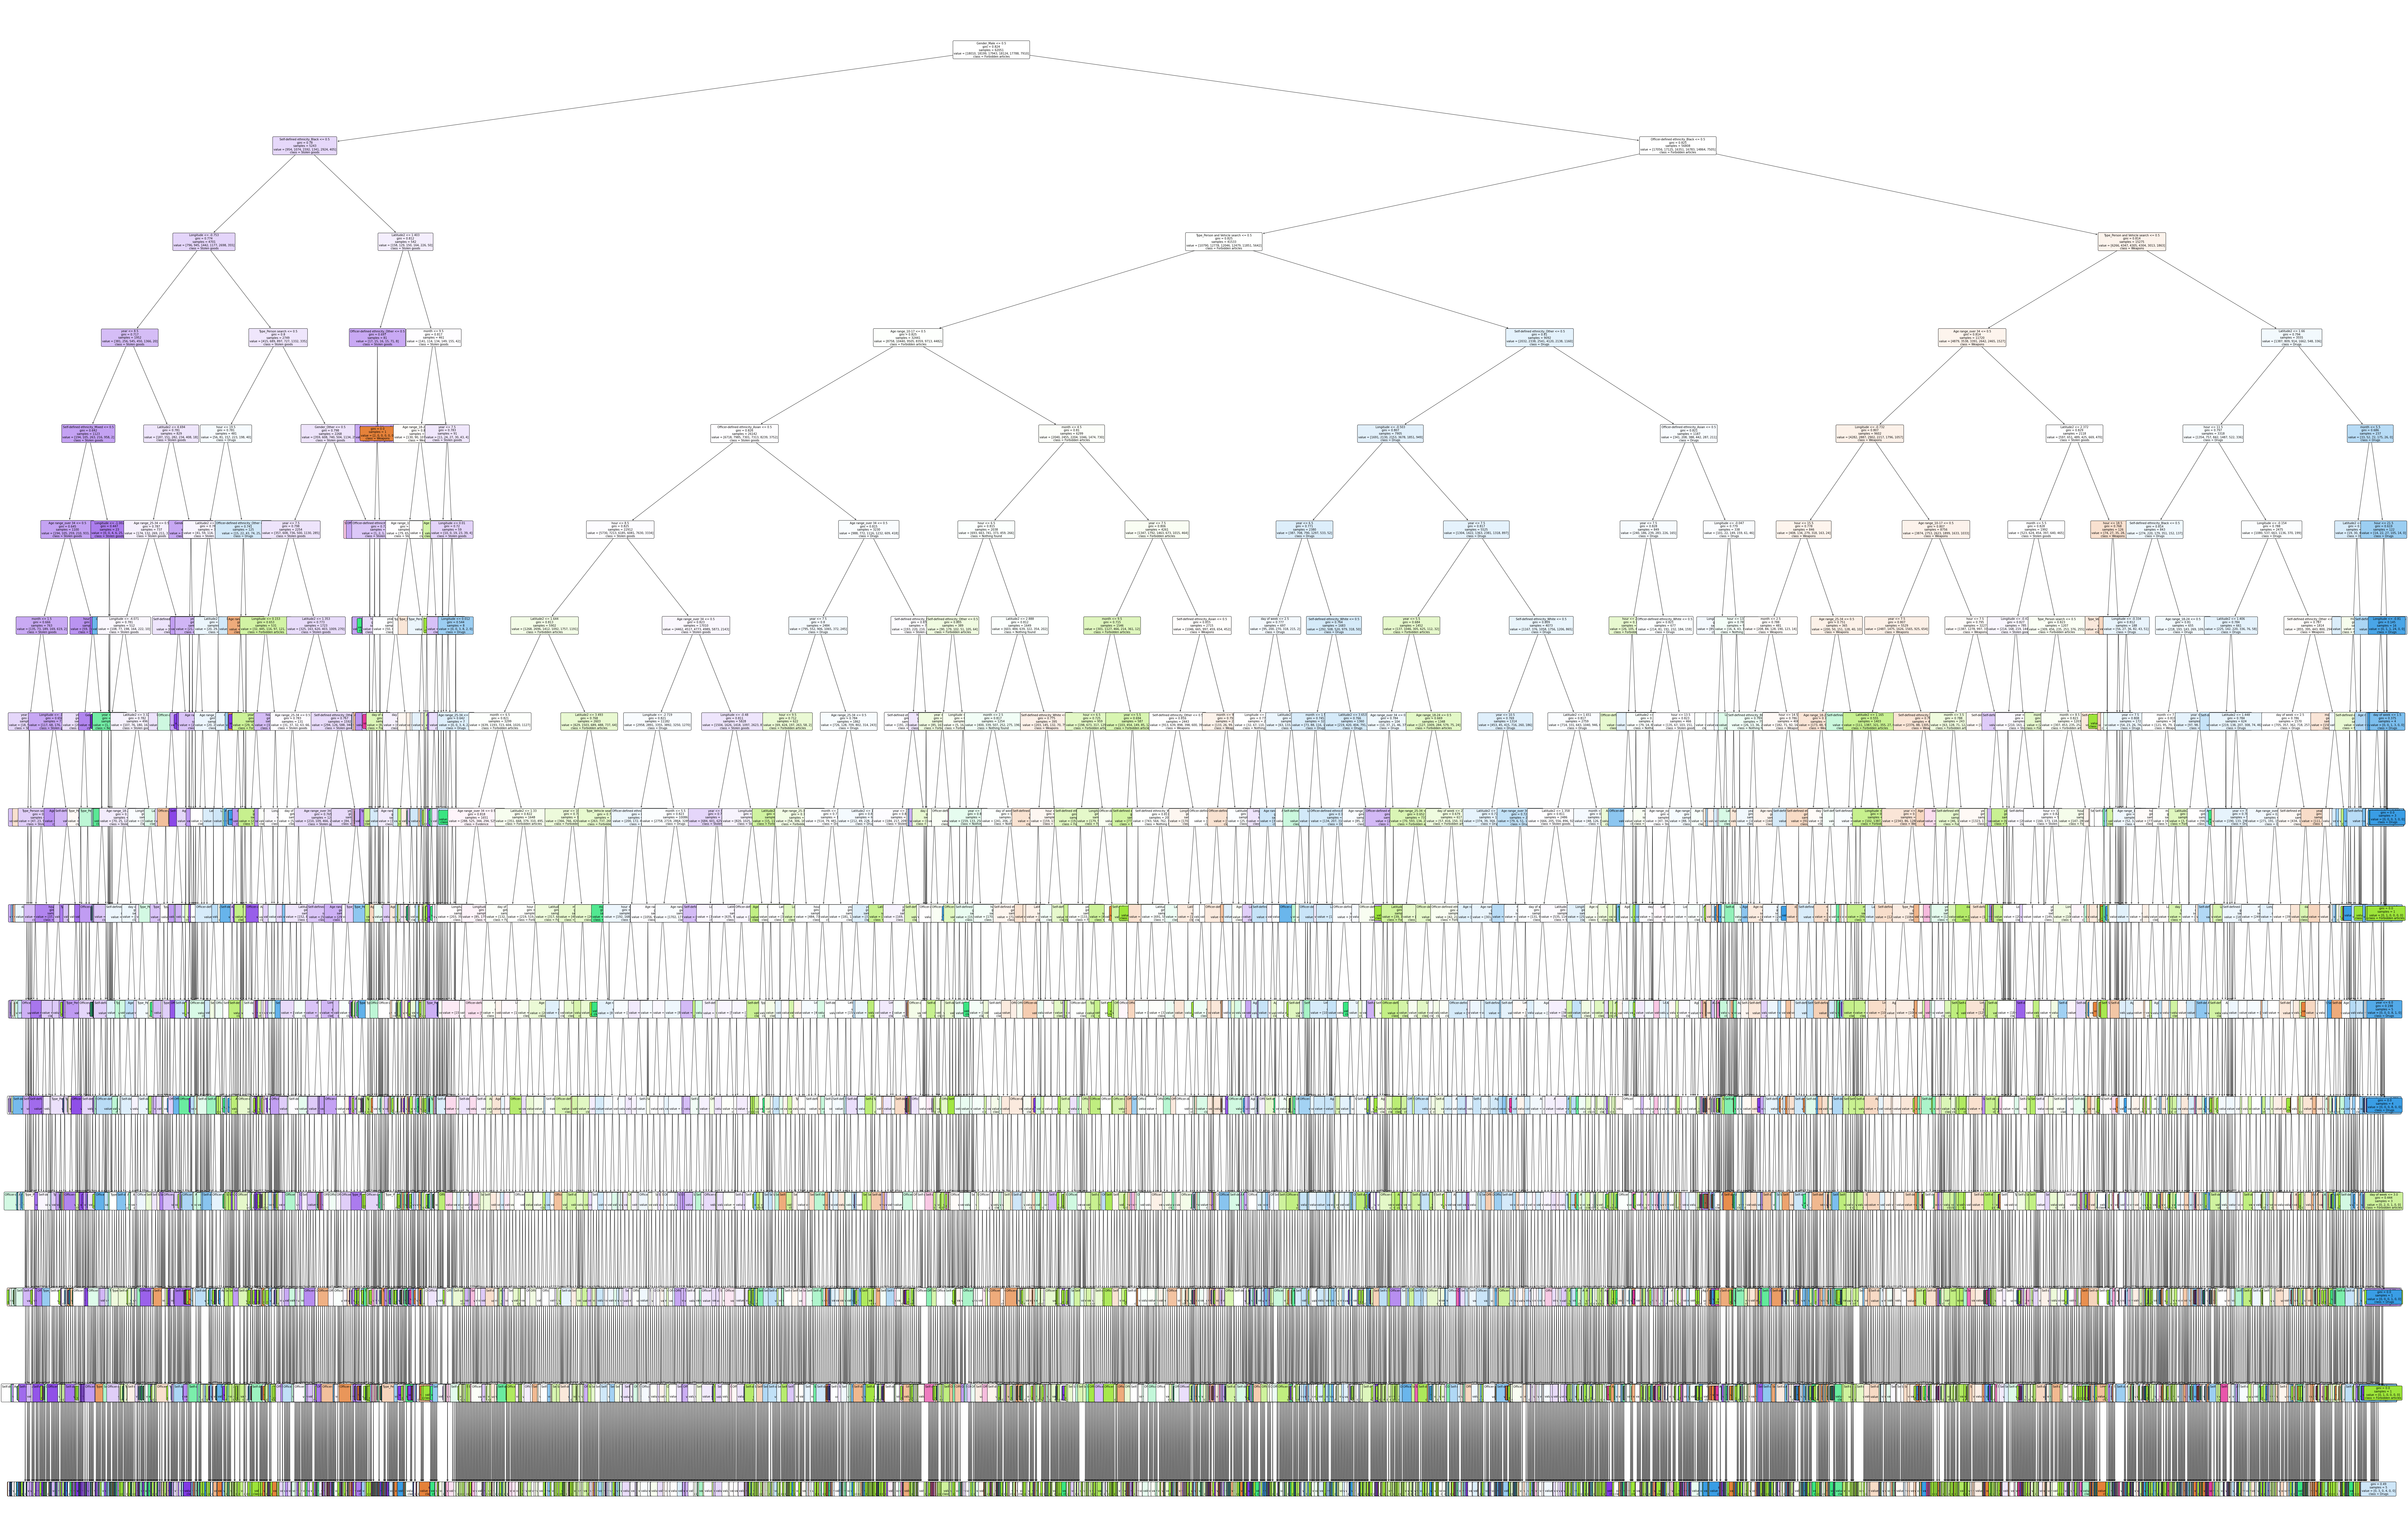

In [47]:
xnames = list(X)
ynames = pd.factorize(Y)[1]
fig = plt.figure(figsize=(150, 100))
plot_tree(model.estimators_[0],filled=True, rounded=True, feature_names=xnames, class_names=ynames, fontsize=10)

plt.show()
fig.savefig("C:\\Users\\20203666\\Downloads\\decistion_tree.png")